In [1]:
from sklearn.datasets import fetch_openml
import numpy as np
mnist = fetch_openml('mnist_784')

C:\Users\realme\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [2]:
mnist.target = mnist.target.astype(np.int8)

In [3]:
X, y = mnist['data'], mnist['target']

In [4]:
import matplotlib
import matplotlib.pyplot as plt

In [5]:
y[440]

0

In [6]:
digit = X.iloc[440]

In [7]:
digit = digit.values.reshape(28,28)

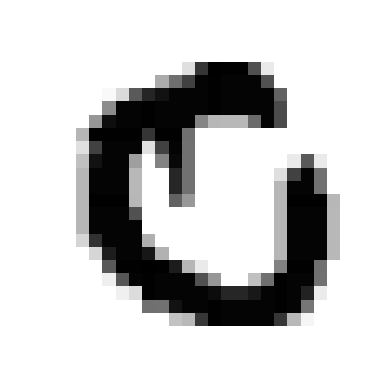

In [8]:
plt.imshow(digit, cmap = matplotlib.cm.binary)
plt.axis("off")
plt.show()

In [9]:
X_train = X[:60000]
X_test = X[60000:]
y_train = y[:60000]
y_test = y[60000:]

In [10]:
shuffling_index = np.random.permutation(60000)

In [11]:
X_train, y_train = X_train.iloc[shuffling_index], y_train.iloc[shuffling_index]

## binary classification

In [12]:
y_train_6 = y_train == 6
y_test_6 = y_test == 6

In [13]:
from sklearn.linear_model import SGDClassifier
sgd_classifier = SGDClassifier(max_iter = 20, tol=100000000000000000)
sgd_classifier.fit(X_train, y_train_6)

SGDClassifier(max_iter=20, tol=100000000000000000)

In [14]:
sgd_classifier.predict([X.iloc[32]])

C:\Users\realme\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

In [15]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_classifier, X_train, y_train_6, cv = 4)

array([0.9828, 0.9824, 0.966 , 0.9784])

### making a dumb classifier

In [16]:
from sklearn.base import BaseEstimator

class DumbClassifier(BaseEstimator):
    def fit(self, X, y = None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype = bool)

In [17]:
dumbClassifier = DumbClassifier()
cross_val_score(dumbClassifier, X_train, y_train_6, scoring = "accuracy")

array([0.90033333, 0.90241667, 0.89958333, 0.90283333, 0.90166667])

In [18]:
sum(y_train_6)/60000

0.09863333333333334

### confusion matrix

In [19]:
from sklearn.model_selection import cross_val_predict

In [20]:
y_train_pred = cross_val_predict(sgd_classifier, X_train, y_train_6)

In [21]:
from sklearn.metrics import confusion_matrix

In [22]:
confusion_matrix(y_train_6, y_train_pred)

array([[53183,   899],
       [  594,  5324]], dtype=int64)

true - negatives = 52723
flase - positives = 1359
false - negatives = 411
true - positives = 5507

In [23]:
y_train_perfect = y_train_6

In [24]:
confusion_matrix(y_train_6, y_train_perfect)

array([[54082,     0],
       [    0,  5918]], dtype=int64)

### precision

In [25]:
from sklearn.metrics import precision_score

In [26]:
precision_score(y_train_6, y_train_pred)

0.855535915153463

In [27]:
precision_score(y_train_6, y_train_perfect)

1.0

### recall 

recall = sensitivity = true-positives/(true-positives + flase-negatives)

In [28]:
from sklearn.metrics import recall_score

In [29]:
recall_score(y_train_6, y_train_pred)

0.8996282527881041

### f1 scores (harmonic mean)

f1 = 2/(1/precision + 1/recall)

In [30]:
from sklearn.metrics import f1_score

In [31]:
f1_score(y_train_6, y_train_pred)

0.8770282513796228

In [32]:
sgd_classifier.predict([X.iloc[69999]])

C:\Users\realme\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

In [33]:
digit = X.iloc[69999].values.reshape(28,28)

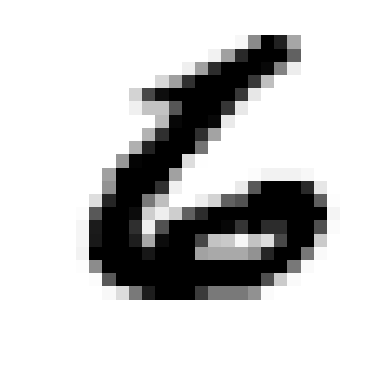

In [34]:
plt.imshow(digit, cmap = matplotlib.cm.binary)
plt.axis("off")
plt.show()

In [35]:
y_score = sgd_classifier.decision_function([X.iloc[69999]])

C:\Users\realme\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


In [36]:
threshold = 20000
y_score > threshold 

array([ True])

In [37]:
from sklearn.metrics import precision_recall_curve

In [38]:
scores = cross_val_predict(sgd_classifier, X_train, y_train_6, method = "decision_function")
precisions, recalls, thresholds = precision_recall_curve(y_train_6, scores)

In [39]:
precisions

array([0.09863333, 0.09863498, 0.09863662, ..., 1.        , 1.        ,
       1.        ])

In [40]:
recalls

array([1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
       3.37952011e-04, 1.68976005e-04, 0.00000000e+00])

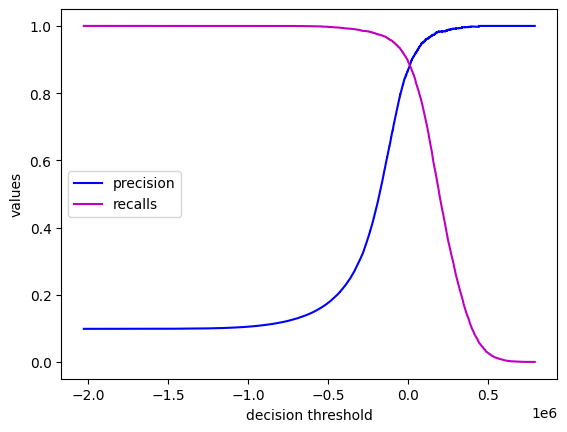

In [41]:
plt.plot(thresholds, precisions[:-1], 'b-', label = "precision")
plt.plot(thresholds, recalls[:-1], 'm-', label = "recalls")
plt.xlabel("decision threshold")
plt.ylabel('values')
plt.legend()

(0.0, 1.0, 0.0, 1.0)

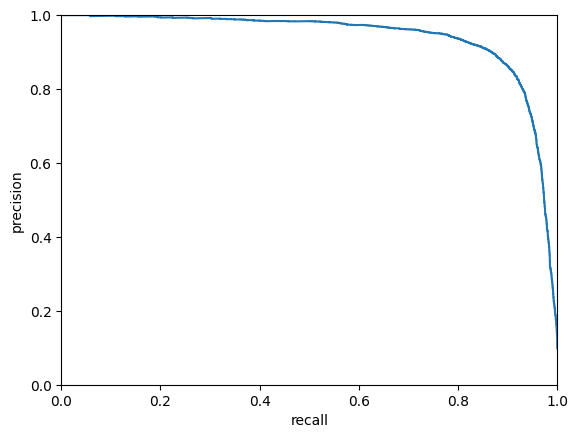

In [42]:
plt.plot(recalls, precisions)
plt.xlabel('recall')
plt.ylabel('precision')
plt.axis([0, 1, 0, 1])

In [43]:
recalls > 0.8

array([ True,  True,  True, ..., False, False, False])

In [44]:
t = [i for i, x in enumerate(recalls > 0.8) if x]

In [45]:
operating_index = t[len(t) - 1]
operating_recall = recalls[operating_index]
operating_precision = precisions[operating_index]
operating_threshold = thresholds[operating_index]

In [46]:
operating_threshold

66561.05356329774

In [47]:
y_train_pred_80 = (scores > operating_threshold)

In [48]:
precision_score(y_train_6, y_train_pred_80)

0.9363132911392406

In [49]:
recall_score(y_train_6, y_train_pred_80)

0.7999324095978371

### ROC curve

In [50]:
from sklearn.metrics import roc_curve

In [51]:
fpr, tpr, thresholds = roc_curve(y_train_6, scores)

Text(0, 0.5, 'TPR: true positive rate')

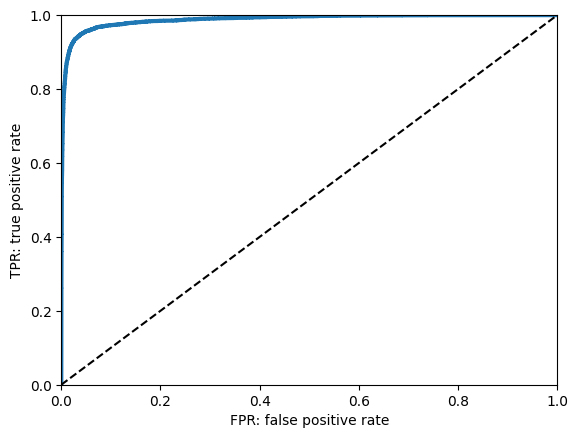

In [52]:
plt.plot(fpr, tpr, lw = 3)
plt.plot([0, 1], [0,1], 'k--')
plt.axis([0, 1, 0, 1])
plt.xlabel("FPR: false positive rate")
plt.ylabel("TPR: true positive rate")

In [53]:
from sklearn.metrics import roc_auc_score

In [54]:
roc_auc_score(y_train_6, scores)

0.9878831843835351

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
forest_clf = RandomForestClassifier()

In [57]:
probabs = cross_val_predict(forest_clf, X_train, y_train_6, method = "predict_proba")

In [58]:
forest_scores = probabs[:,1]

In [59]:
fpr_forest, tpr_forest, threshold_forest = roc_curve(y_train_6, forest_scores)

Text(0, 0.5, 'TPR: true positive rate')

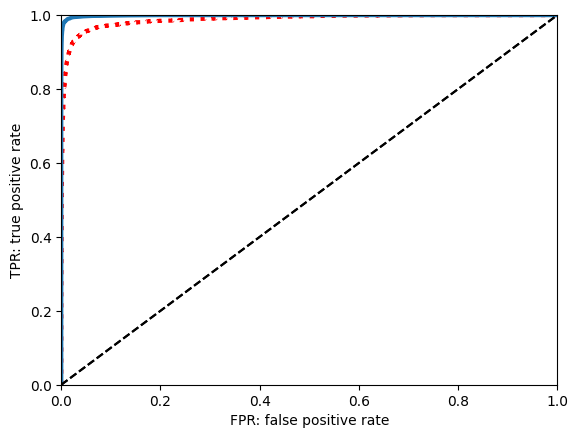

In [60]:
plt.plot(fpr, tpr,'r:', lw = 3,  label = "SGD")
plt.plot(fpr_forest, tpr_forest, linewidth = 3, label = "Forest")
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0, 1], [0,1], 'k--')
plt.axis([0, 1, 0, 1])
plt.xlabel("FPR: false positive rate")
plt.ylabel("TPR: true positive rate")

In [61]:
roc_auc_score(y_train_6, forest_scores)

0.9992751563004617

## multiclass classification

In [62]:
sgd_classifier.fit(X_train, y_train)

SGDClassifier(max_iter=20, tol=100000000000000000)

In [71]:
sgd_classifier.predict([X.iloc[140]])

C:\Users\realme\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([7], dtype=int8)

<function matplotlib.pyplot.show(close=None, block=None)>

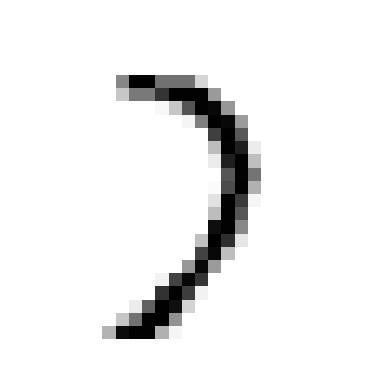

In [72]:
digit = X.iloc[140].values.reshape(28,28)
plt.imshow(digit, cmap = matplotlib.cm.binary)
plt.axis("off")
plt.show

In [73]:
sgd_classifier.decision_function([X.iloc[140]])

C:\Users\realme\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([[ -75497.25919902, -313445.3801364 ,  -73074.75357745,
         -39542.30929092, -178857.7001148 , -283710.13886469,
        -363439.64858932,  -31431.34033194, -165052.55656338,
         -48870.8135178 ]])

In [74]:
from sklearn.multiclass import OneVsOneClassifier

In [75]:
ovo_clf = OneVsOneClassifier(SGDClassifier())

In [77]:
ovo_clf.fit(X_train, y_train)

OneVsOneClassifier(estimator=SGDClassifier())

In [79]:
ovo_clf.predict([X.iloc[130]])

C:\Users\realme\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but OneVsOneClassifier was fitted with feature names
  warnings.warn(


array([3], dtype=int8)

In [83]:
len(ovo_clf.estimators_)

45

In [85]:
forest_clf = RandomForestClassifier()

In [87]:
forest_clf.fit(X_train, y_train)

RandomForestClassifier()

In [89]:
forest_clf.predict([X.iloc[130]])

C:\Users\realme\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([3], dtype=int8)

In [91]:
forest_clf.predict_proba([X.iloc[130]])

C:\Users\realme\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]])

In [96]:
cross_val_score(sgd_classifier, X_train, y_train, scoring = "accuracy", cv = 3)

array([0.8709, 0.8771, 0.8697])

In [94]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

In [97]:
cross_val_score(sgd_classifier, X_train_scaled, y_train, scoring = "accuracy", cv = 3)

array([0.90735, 0.9111 , 0.9093 ])

### error analysis

In [98]:
y_train_pred = cross_val_predict(sgd_classifier, X_train_scaled, y_train)

In [99]:
confusion_matrix = confusion_matrix(y_train, y_train_pred)

In [100]:
confusion_matrix

array([[5735,    2,   23,   11,   12,   44,   43,   10,   39,    4],
       [   1, 6465,   51,   25,    7,   39,    8,    9,  123,   14],
       [  53,   35, 5348,   98,   83,   23,   90,   58,  158,   12],
       [  41,   36,  142, 5345,    3,  240,   35,   55,  138,   96],
       [  16,   24,   40,   10, 5375,    8,   56,   29,   87,  197],
       [  69,   43,   34,  181,   79, 4589,  118,   28,  182,   98],
       [  31,   20,   46,    2,   50,   83, 5631,    6,   49,    0],
       [  21,   22,   70,   26,   63,   10,    8, 5788,   19,  238],
       [  44,  150,   70,  152,   13,  153,   53,   23, 5054,  139],
       [  44,   32,   27,   86,  163,   27,    3,  184,   84, 5299]],
      dtype=int64)

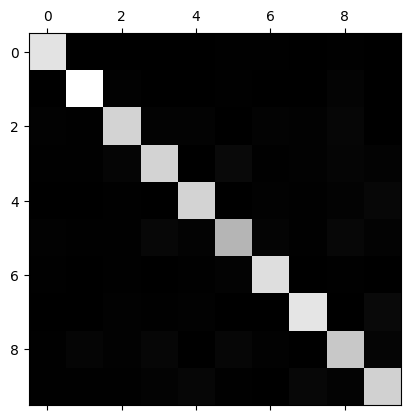

In [102]:
plt.matshow(confusion_matrix, cmap = plt.cm.gray)
plt.show()

In [104]:
row_sums = confusion_matrix.sum(axis = 1, keepdims = True)

In [105]:
norm_confusion_matrix = confusion_matrix/row_sums

In [108]:
np.fill_diagonal(norm_confusion_matrix, 0)

In [109]:
norm_confusion_matrix

array([[0.        , 0.00033767, 0.00388317, 0.00185717, 0.002026  ,
        0.00742867, 0.00725983, 0.00168833, 0.0065845 , 0.00067533],
       [0.00014832, 0.        , 0.00756452, 0.0037081 , 0.00103827,
        0.00578463, 0.00118659, 0.00133492, 0.01824384, 0.00207654],
       [0.0088956 , 0.00587445, 0.        , 0.01644847, 0.01393085,
        0.00386036, 0.01510574, 0.00973481, 0.02651897, 0.0020141 ],
       [0.00668733, 0.0058718 , 0.02316099, 0.        , 0.00048932,
        0.03914533, 0.00570869, 0.0089708 , 0.02250856, 0.01565813],
       [0.00273879, 0.00410818, 0.00684697, 0.00171174, 0.        ,
        0.00136939, 0.00958576, 0.00496405, 0.01489216, 0.03372133],
       [0.01272828, 0.00793212, 0.00627191, 0.03338867, 0.01457296,
        0.        , 0.0217672 , 0.0051651 , 0.03357314, 0.01807785],
       [0.00523826, 0.00337952, 0.0077729 , 0.00033795, 0.0084488 ,
        0.01402501, 0.        , 0.00101386, 0.00827982, 0.        ],
       [0.00335196, 0.00351157, 0.0111731

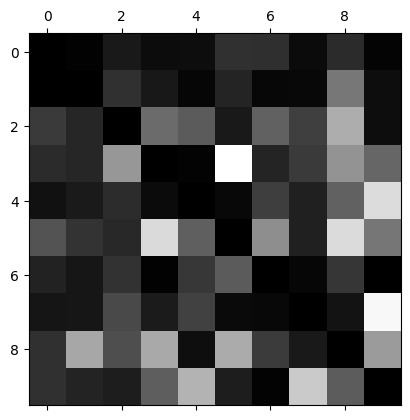

In [111]:
plt.matshow(norm_confusion_matrix, cmap = plt.cm.gray)
plt.show()